<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/Gutenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maybe rename this "Basic Text Normalization"

Import corpus from Project Gutenberg

Strip header and footer

Put in lowercase

Remove stopwords

wordclouds

long words

hapaxes


Zipf's Law

lemmatization, stemming, contractions

lexical dispersion plot: move to a  different notebook?

State of the Union speeches on huggingface https://huggingface.co/datasets/jsulz/state-of-the-union-addresses/viewer


In [ ]:
import requests

# Fetch book (Plain Text UTF-8)
url = "https://www.gutenberg.org/cache/epub/74409/pg74409.txt"
url = "https://www.gutenberg.org/cache/epub/70432/pg70432.txt"#Dorthy Sayers, Clouds of Witness
response = requests.get(url)
text = response.text

print(text[:500])


﻿The Project Gutenberg eBook of Clouds of witness
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this e


In [ ]:
# Strip headers and footers
start_index = text.find("*** START OF THE PROJECT GUTENBERG EBOOK CLOUDS OF WITNESS ***")
end_index = text.find("*** END OF THE PROJECT GUTENBERG EBOOK CLOUDS OF WITNESS ***")
corpus = text[start_index:end_index]

# Display first 500 characters
print(corpus[:500])

*** START OF THE PROJECT GUTENBERG EBOOK CLOUDS OF WITNESS ***





                           Clouds of Witness

                           DOROTHY L. SAYERS

   Copyright 1927 by The Dial Press, Inc. This edition contains the
                  complete text of the original book.


                            THE SOLUTION OF
                        THE RIDDLESDALE MYSTERY
                                 WITH
                               A REPORT
                            


In [ ]:
print(corpus[700:750])

 inimitable stories of Tong-king never have any re


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [ ]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

# Tokenize the corpus into words
words = word_tokenize(corpus.lower())

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the most common words
print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Perform additional analysis
total_words = len(filtered_words)
unique_words = len(word_counts)
lexical_diversity = unique_words / total_words

print("\nCorpus Analysis:")
print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")
print(f"Lexical diversity (unique/total): {lexical_diversity:.2f}")


Most common words:
said: 759
peter: 366
lord: 359
parker: 268
man: 245
know: 239
cathcart: 235
well: 219
one: 216
mary: 209

Corpus Analysis:
Total words: 40035
Unique words: 7952
Lexical diversity (unique/total): 0.20


In [ ]:
filtered_words[2000:2050]

['jury',
 'roomy',
 'house',
 'built',
 'plain',
 'style',
 'leased',
 'present',
 'owner',
 'walter',
 'montague',
 'lord',
 'denver',
 'season',
 'montague',
 'states',
 'witness',
 'resuming',
 'got',
 'conservatory',
 'door',
 'saw',
 'man',
 'outside',
 'bending',
 'something',
 'ground',
 'looked',
 'astonished',
 'see',
 'brother',
 'coroner',
 'saw',
 'expect',
 'witness',
 'hardly',
 'know',
 'happened',
 'quickly',
 'thought',
 'burglars',
 'think',
 'coroner',
 'grace',
 'told',
 'us',
 'saw',
 'cried',
 'god',
 'killed']

In [ ]:
print(len(words))
print(len(filtered_words))

107012
40035


In [ ]:
all_fd=nltk.FreqDist(words)
filtered_fd=nltk.FreqDist(filtered_words)

In [ ]:
wordcloud_all = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      # random_state=4,
                      contour_color='steelblue').generate_from_frequencies(all_fd)

wordcloud_filtered = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      # random_state=4,
                      contour_color='steelblue').generate_from_frequencies(filtered_fd)


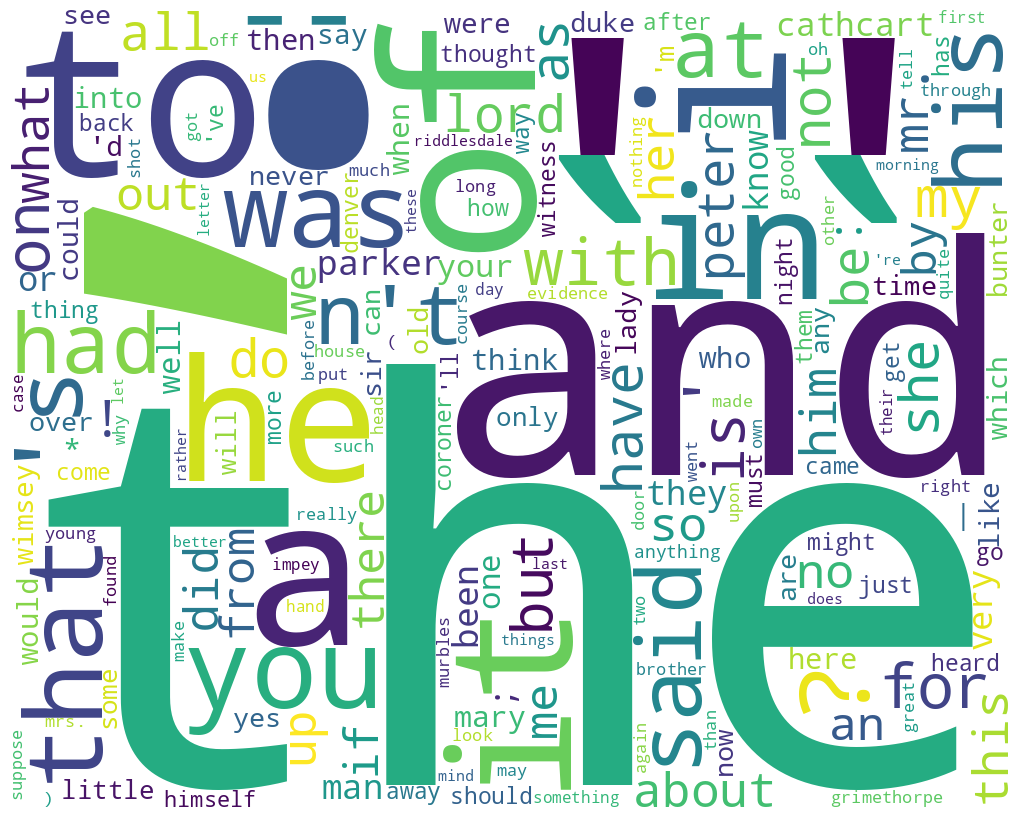

In [ ]:
# plot the WordCloud image: all words
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud_all)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()




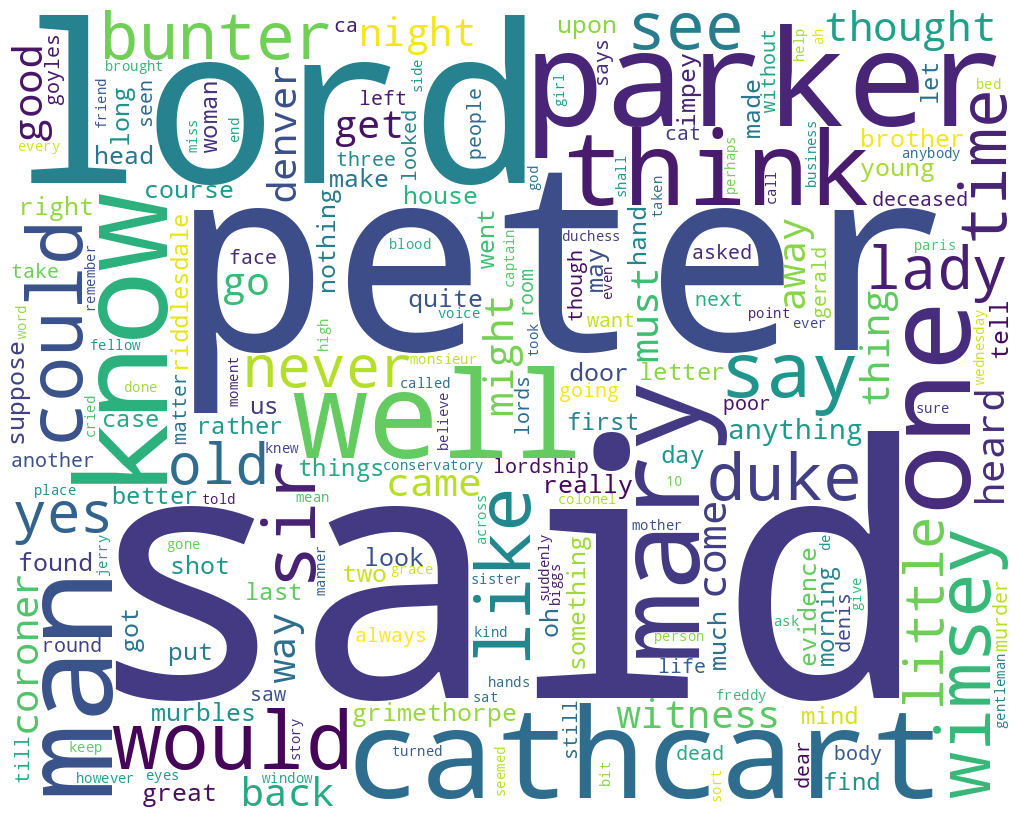

In [ ]:
# plot the WordCloud image: filtered
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
top_words = [word for (word, freq) in all_fd.most_common(10)]
print(top_words)

top_words_filtered = [word for (word, freq) in filtered_fd.most_common(20)]
print(top_words_filtered)

[',', '.', 'the', "''", '``', 'and', 'to', 'of', 'a', 'i']
['said', 'peter', 'lord', 'parker', 'man', 'know', 'cathcart', 'well', 'one', 'mary', 'think', 'would', 'say', 'could', 'wimsey', 'like', 'sir', 'bunter', 'see', 'duke']


In [ ]:
filtered_fd.most_common(20)

[('said', 759),
 ('peter', 366),
 ('lord', 359),
 ('parker', 268),
 ('man', 245),
 ('know', 239),
 ('cathcart', 235),
 ('well', 219),
 ('one', 216),
 ('mary', 209),
 ('think', 193),
 ('would', 192),
 ('say', 178),
 ('could', 174),
 ('wimsey', 169),
 ('like', 169),
 ('sir', 161),
 ('bunter', 153),
 ('see', 152),
 ('duke', 151)]

<Figure size 1200x900 with 0 Axes>

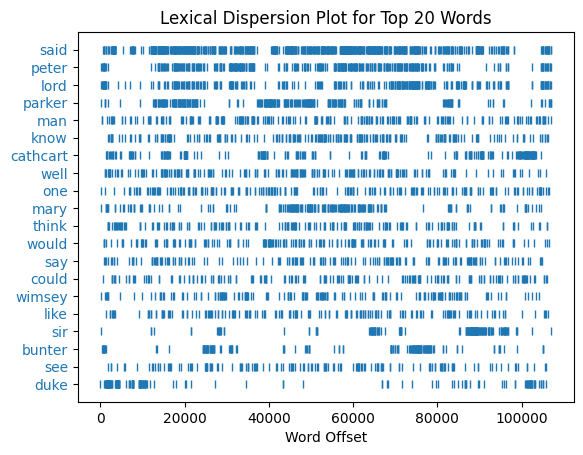

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(words, top_words_filtered, ignore_case=True, title='Lexical Dispersion Plot for Top 20 Words')
plt.show()

In [ ]:
single_words = filtered_fd.hapaxes()
print(f"number of hapaxes={len(single_words)}")

import random
random.choice(single_words)

number of hapaxes=4058


'callous'

In [ ]:
V = set(filtered_words)
long_words = [w for w in V if len(w) > 14]

long_words

['undistinguished',
 'extraordinarily',
 'subconsciousness',
 'notwithstanding',
 'cinematographic',
 'sympathetically',
 'representatives',
 'inconveniencing',
 'heartbreakingly',
 'disillusionment',
 'conscientiously',
 'misunderstanding',
 'personification',
 'congratulations',
 'infailliblement']

<Figure size 1200x900 with 0 Axes>

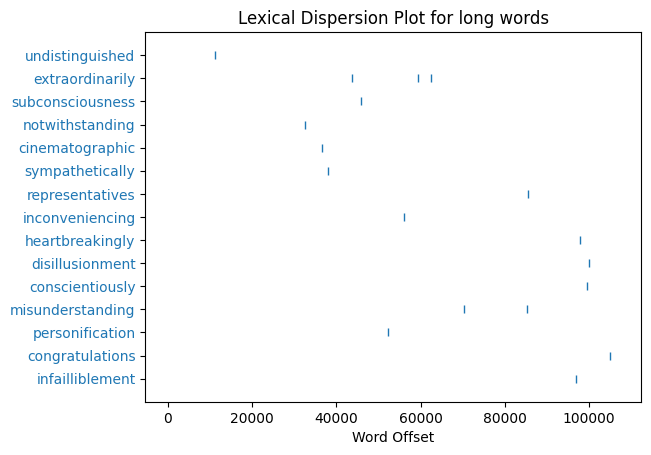

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(words, long_words, ignore_case=True, title='Lexical Dispersion Plot for long words')
plt.show()